<div class="frontmatter text-center">
<h1> MATH5027 Scientific Python</h1>
<h3>Central European University, Fall 2017/2018</h3>
<h3>Instructor: Prof. Roberta Sinatra, TA: Johannes Wachs</h3>
inspired to a lecture of J.R. Johansson [http://jrjohansson.github.io](http://jrjohansson.github.io).
</div>

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Some more stuff on Numpy
## Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication. These are fast operations in python, with speed comparable to that they would have in C/Fortran 

### Scalar-array operations

We can use the usual arithmetic operators to multiply, add, subtract, and divide arrays with scalar numbers.

In [3]:
import numpy as np
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [3]:
v1 * 2

array([0, 2, 4, 6, 8])

In [4]:
v1 + 2

array([2, 3, 4, 5, 6])

In [43]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)]) #Remember: list comprehension is also fast!
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [6]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [20, 22, 24, 26, 28],
       [40, 42, 44, 46, 48],
       [60, 62, 64, 66, 68],
       [80, 82, 84, 86, 88]])

In [7]:
A+2

array([[ 2,  3,  4,  5,  6],
       [12, 13, 14, 15, 16],
       [22, 23, 24, 25, 26],
       [32, 33, 34, 35, 36],
       [42, 43, 44, 45, 46]])

### Element-wise array-array operations

When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise** operations:

In [8]:
A * A # element-wise multiplication

array([[   0,    1,    4,    9,   16],
       [ 100,  121,  144,  169,  196],
       [ 400,  441,  484,  529,  576],
       [ 900,  961, 1024, 1089, 1156],
       [1600, 1681, 1764, 1849, 1936]])

In [9]:
v1 * v1

array([ 0,  1,  4,  9, 16])

If we multiply arrays with compatible shapes, we get an element-wise multiplication of each row:

In [10]:
A.shape, v1.shape

((5, 5), (5,))

In [8]:
 B = np.array([[1,2], [4,5], [8,9]])
B

array([[1, 2],
       [4, 5],
       [8, 9]])

In [9]:
B.shape

(3, 2)

In [11]:
A * v1

array([[  0,   1,   4,   9,  16],
       [  0,  11,  24,  39,  56],
       [  0,  21,  44,  69,  96],
       [  0,  31,  64,  99, 136],
       [  0,  41,  84, 129, 176]])

***
## Exercise
* First create a list L1 of 10000 numbers with range, and an array A1 with arange. Then time how long it takes to create a list L2 with list comprehension where you add 1 to all elements of L1, and an array A2 which is A1+1. Which one is faster? How faster?

* Try other simple arithmetic elementwise operations, like the ones below, and time them against their pure python counterparts. Generate:
* $[2^0, 2^1, 2^2, 2^3, 2^4]$
* $a_j = 2^{3j} - j$
***

In [15]:
L1 = [i for i in range(0,10000)]
A1 = np.arange(10000)

In [12]:
A1[0:50]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [27]:
import timeit
%timeit(L1[i] + 1 for i in range(0,10000))
#L1 = [L1[i] + 1 for i in range(0,10000)]

1000000 loops, best of 3: 602 ns per loop


In [28]:
%timeit(A1 + 1)

The slowest run took 70.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.07 µs per loop


### Matrix algebra

What about matrix mutiplication? There are two ways to do it. We can either use the `dot` function, which applies a matrix-matrix, matrix-vector, or inner vector multiplication to its two arguments: 

In [40]:
C = np.array([[1,2], [3,4]])
z = np.arange(2)
np.dot(C, C)

array([[ 7, 10],
       [15, 22]])

In [41]:
np.dot(C, z)

array([2, 4])

In [13]:
np.dot(A, A)

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [14]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [15]:
np.dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [56]:
M = np.matrix(A) # The matrix is different from an array of arrays! 
v = np.matrix(v1).T # make it a column vector
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [52]:
print(type(A))
print(type(M))

<class 'numpy.ndarray'>
<class 'numpy.matrixlib.defmatrix.matrix'>


In [53]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [17]:
M * M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [18]:
M * v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

In [55]:
# inner product
v.T * v # Note that this is still a matrix, and not a simple ``scalar'', like an int or a float!

matrix([[30]])

In [22]:
# with matrix objects, standard matrix algebra applies
v + M*v

matrix([[ 30],
        [131],
        [232],
        [333],
        [434]])

If we try to add, subtract or multiply objects with incomplatible shapes we get an error:

In [22]:
v = np.matrix([1,2,3,4,5,6]).T

In [24]:
np.shape(M), np.shape(v)

((5, 5), (6, 1))

In [25]:
M * v

ValueError: shapes (5,5) and (6,1) not aligned: 5 (dim 1) != 6 (dim 0)

### Array/Matrix transformations

Above we have used the `.T` to transpose the matrix object `v`. We could also have used the `transpose` function to accomplish the same thing. 

Other mathematical functions that transform matrix objects are:

In [57]:
C = np.matrix([[1j, 2j], [3j, 4j]])
C

matrix([[ 0.+1.j,  0.+2.j],
        [ 0.+3.j,  0.+4.j]])

In [29]:
np.conjugate(C)

matrix([[ 0.-1.j,  0.-2.j],
        [ 0.-3.j,  0.-4.j]])

Hermitian conjugate: transpose + conjugate

In [30]:
C.H

matrix([[ 0.-1.j,  0.-3.j],
        [ 0.-2.j,  0.-4.j]])

We can extract the real and imaginary parts of complex-valued arrays using `real` and `imag`:

In [31]:
np.real(C) # same as: C.real

matrix([[ 0.,  0.],
        [ 0.,  0.]])

In [32]:
np.imag(C) # same as: C.imag

matrix([[ 1.,  2.],
        [ 3.,  4.]])

In [33]:
abs(C)

matrix([[ 1.,  2.],
        [ 3.,  4.]])

### Matrix computations

#### Inverse

In [34]:
np.linalg.inv(C) # equivalent to C.I 

matrix([[ 0.+2.j ,  0.-1.j ],
        [ 0.-1.5j,  0.+0.5j]])

In [35]:
C.I * C

matrix([[  1.00000000e+00+0.j,   0.00000000e+00+0.j],
        [  1.11022302e-16+0.j,   1.00000000e+00+0.j]])

#### Determinant

In [36]:
np.linalg.det(C)

(2.0000000000000004+0j)

In [37]:
np.linalg.det(C.I)

(0.49999999999999972+0j)

#### More functions: sum, prod, and trace

In [94]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
# sum up all elements
np.sum(d)

45

In [96]:
# product of all elements
np.prod(d+1)

3628800

In [97]:
# cummulative sum
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [98]:
# cummulative product
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [99]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [100]:
# same as: diag(A).sum()
np.trace(A)

110

When you have two dimensional objects, you can specificy along which dimension (axis) you want to perform the sum (or mean, or the maximum, etc.)
<img src="sum_axis.png">

In [101]:
x = np.array([[1, 1], [2, 2]])
print x
print x.sum(axis=0)   # columns (first dimension)
print x[:, 0].sum(), x[:, 1].sum()
print x.sum(axis=1)   # rows (second dimension)
print x[0, :].sum(), x[1, :].sum()

[[1 1]
 [2 2]]
[3 3]
3 3
[2 4]
2 4


## Exercise
Let’s do some manipulations (we need masks and fancy indexing) on numpy arrays by starting with an image of a racoon. the module Scipy provides a 2D array of this image with the scipy.misc.face function:


In [20]:
from scipy import misc
face = misc.face(gray=True)
face.shape

(768, 1024)

In [46]:
F = np.matrix(face)
F

matrix([[114, 130, 145, ..., 119, 129, 137],
        [ 83, 104, 123, ..., 118, 134, 146],
        [ 68,  88, 109, ..., 119, 134, 145],
        ..., 
        [ 98, 103, 116, ..., 144, 143, 143],
        [ 94, 104, 120, ..., 143, 142, 142],
        [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

**An image is nothing else than a matrix of values**. If we pass it to the right plotting command and give the right plotting instructions, the image will appear:

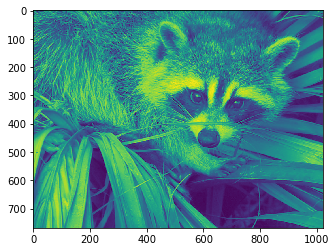

In [5]:
face = misc.face(gray=True)
plt.imshow(face)
plt.show()

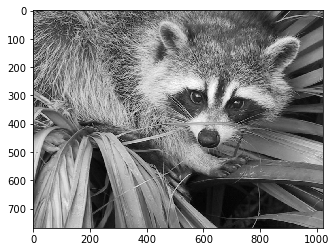

In [10]:
face = misc.face(gray=True)
plt.imshow(face, cmap=plt.cm.gray)   
plt.show()

We can then use masks and fancy indexing to crop the image

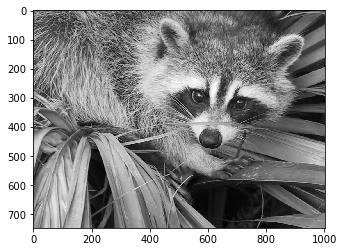

In [19]:
crop_face = face[10:-10, 10:-10]
plt.imshow(crop_face, cmap=plt.cm.gray) 

## Exercise 3
Can you frame the face with a black locket? 

<img src="racoon_masked.png">

That is identify the corresponding units of the matrix that you want to be black (se them equal to zero). The center of the face is around (660, 330), so you need to define a mask by this condition $(y-300)^2 + (x-660)^2$. Look up np.ogrid to creat column and row matrixes out of the arrays. Indeed, you do need a matrix! :)

In [27]:
s = F.shape
s[0]

768

In [47]:
import math
for i in range(0,768): 
    for j in range(0,1024):
        if np.sqrt(np.square(i - 330) + np.square(j - 660)) > 370: 
            F[i,j] = 0 


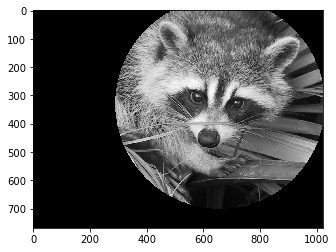

In [48]:
plt.imshow(F, cmap=plt.cm.gray)   
plt.show()

## Reshaping, resizing and stacking arrays

The shape of an Numpy array can be modified ***without copying*** the underlaying data, which makes it a fast operation even for large arrays.

In [145]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [146]:
n, m = A.shape

In [147]:
B = A.reshape((1,n*m))
B

array([[ 0,  1,  2,  3,  4, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [148]:
B[0,0:5] = 5 # modify the array

B

array([[ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
        32, 33, 34, 40, 41, 42, 43, 44]])

In [149]:
A

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

***Caution!!!*** The original variable is also changed. **B is only a different view of the same data.**

We can also use the function `flatten` to make a higher-dimensional array into a vector. ***But this function create a copy of the data.***

In [106]:
B = A.flatten()

B

array([ 5,  5,  5,  5,  5, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [107]:
B[0:5] = 10

B

array([10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 20, 21, 22, 23, 24, 30, 31,
       32, 33, 34, 40, 41, 42, 43, 44])

In [108]:
A # now A has not changed, because B's data is a copy of A's, not refering to the same data

array([[ 5,  5,  5,  5,  5],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

**Always check the documentation to see what your function does!**

There is a way to do a deep copy of our variable - check below

## Adding a new dimension: newaxis

With `newaxis`, we can insert new dimensions in an array, for example converting a vector to a column or row matrix:

In [150]:
v = np.array([1,2,3])

In [151]:
np.shape(v)

(3,)

In [152]:
# make a column matrix of the vector v
v[:, np.newaxis]

array([[1],
       [2],
       [3]])

In [153]:
# column matrix
v[:,np.newaxis].shape

(3, 1)

In [154]:
# row matrix
v[np.newaxis,:].shape

(1, 3)

## Stacking and repeating arrays

Using function `repeat`, `tile`, `vstack`, `hstack`, and `concatenate` we can create larger vectors and matrices from smaller ones:

### tile and repeat

In [54]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [55]:
# repeat each element 3 times
b = np.repeat(a, 3)
b 

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [53]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

### concatenate

In [59]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [57]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [58]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### hstack and vstack

In [161]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [162]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Copy and "deep copy"

To achieve high performance, assignments in Python usually do not copy the underlaying objects. This is important for example when objects are passed between functions, to avoid an excessive amount of memory copying when it is not necessary (technical term: pass by reference). 

In [210]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [211]:
# now B is referring to the same array data as A 
B = A
B

array([[1, 2],
       [3, 4]])

In [212]:
# changing B affects A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [213]:
A

array([[10,  2],
       [ 3,  4]])

If we want to avoid this behavior, so that when we get a new completely independent object `B` copied from `A`, then we need to do a so-called **"deep copy"** using the function `copy`:

In [215]:
B = np.copy(A)

In [216]:
# now, if we modify B, A is not affected
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [217]:
A

array([[10,  2],
       [ 3,  4]])

## Iterating over array elements

Generally, we want to avoid iterating over the elements of arrays whenever we can (at all costs). The reason is that in a interpreted language like Python (or MATLAB), iterations are really slow compared to vectorized operations. 

However, sometimes iterations are unavoidable. For such cases, the Python `for` loop is the most convenient way to iterate over an array:

In [219]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [220]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

('row', array([1, 2]))
1
2
('row', array([3, 4]))
3
4


When we need to iterate over each element of an array and modify its elements, it is convenient to use the `enumerate` function to obtain both the element and its index in the `for` loop: 

In [221]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # update the matrix M: square each element
        M[row_idx, col_idx] = element ** 2

('row_idx', 0, 'row', array([1, 2]))
('col_idx', 0, 'element', 1)
('col_idx', 1, 'element', 2)
('row_idx', 1, 'row', array([3, 4]))
('col_idx', 0, 'element', 3)
('col_idx', 1, 'element', 4)


In [222]:
# each element in M is now squared
M

array([[ 1,  4],
       [ 9, 16]])

## Broadcasting

Basic operations on numpy arrays (addition, etc.) are elementwise.
This works on arrays of the same size.
**Nevertheless**, It's also possible to do operations on arrays of different sizes 
if Numpy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.
The image below gives an example of broadcasting:
<img src="broadcasting.png">


## Vectorizing functions

As mentioned several times by now, to get good performance we should try to avoid looping over elements in our vectors and matrices, and instead use vectorized algorithms. The first step in converting a scalar algorithm to a vectorized algorithm is to make sure that the functions we write work with vector inputs.

In [223]:
def Theta(x):
    """
    Scalar implemenation of the Heaviside step function.
    """
    if x >= 0:
        return 1
    else:
        return 0

In [224]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

OK, that didn't work because we didn't write the `Theta` function so that it can handle a vector input... 

To get a ***vectorized version of Theta*** we can use the Numpy function `vectorize`. In many cases it can automatically vectorize a function:

In [226]:
Theta_vec = np.vectorize(Theta)

In [227]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

We can also implement the function to accept a vector input from the beginning (requires more effort but might give better performance):

In [228]:
def Theta(x):
    """
    Vector-aware implemenation of the Heaviside step function.
    """
    return 1 * (x >= 0)

In [229]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [230]:
# still works for scalars as well
Theta(-1.2), Theta(2.6)

(0, 1)

## Using arrays in conditions

When using arrays in conditions,for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalutes to `True`:

In [171]:
M

array([[ 1,  4],
       [ 9, 16]])

In [172]:
if (M > 5).any():
    print("at least one element in M is larger than 5")
else:
    print("no element in M is larger than 5")

at least one element in M is larger than 5


In [173]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## Further reading

* http://numpy.scipy.org
* http://scipy.org/Tentative_NumPy_Tutorial
* http://scipy.org/NumPy_for_Matlab_Users - A Numpy guide for MATLAB users.

In [14]:
t = np.array(([0,1,1,0],[0,1,0,0], [0,0,0,0], [0,0,1,1], [0,0,1,1]))
t

array([[0, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 1]])

In [15]:
grids = np.ogrid[[slice(0, i) for i in t.shape]]

In [18]:
grids

[array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3]])]